# **Hypothesis Testing**


In [ ]:
# Install missing package in this notebook environment
%pip install statsmodels


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [55]:

import pandas as pd
from scipy import stats
import numpy as np
from statsmodels.stats.anova import AnovaRM
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import seaborn as sns
from scipy.stats import levene

In [31]:
ratings_url = 'data/teachingratings.csv'
ratings_df = pd.read_csv(ratings_url)
ratings_df

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,no,37,male,more,0.933396,3.5,upper,yes,yes,15,17,40,1,0,0,0,1,1,1
459,no,58,female,more,0.111563,3.5,upper,yes,yes,26,34,47,1,0,1,0,1,1,1
460,no,42,male,more,-0.900580,4.0,upper,yes,yes,45,86,61,1,0,0,0,1,1,1
461,no,39,male,more,0.643014,4.3,upper,yes,yes,22,29,62,1,0,0,0,1,1,1


### T-Test: Does gender affect teaching evaluation rates?

Justify why a t-test is suitable for this question.


In [ ]:
# your code here

# Separate samples
male_stat = ratings_df.loc[ratings_df['gender'] == 'male', 'eval']
female_stat = ratings_df.loc[ratings_df['gender'] == 'female', 'eval']

# Perform Student t-test
t, p = stats.ttest_ind(male_stat, female_stat)

# Print test results
print('Student t-test statistic: %.3f' % t)
print('p-value: %.3f' % p)

# Interpret test results
alpha = 0.05
if p > alpha:
    print('The difference between the means of the two samples is not significant (fail to reject H0)')
else:
    print('The difference between the means of the two samples is significant (reject H0)')


Student t-test statistic: 3.250
p-value: 0.001
The difference between the means of the two samples is significant (reject H0)


### ANOVA: Does beauty  score for instructors  differ by age?

Justify why ANOVA is suitable for this question.

In [39]:
# your code here
# One-way ANOVA is a test that is used to find out whether there exists a statistically significant difference between the mean values of more than one group.
# - H0 (null hypothesis): $μ_1 = ... = μ_k$ (It implies that the means of all the population are equal)
# - H1 (null hypothesis): It states that there will be at least one population mean that differs from the rest

groups = [g['beauty'].values for _, g in ratings_df.groupby('age')]
stats.f_oneway(*groups)


F_onewayResult(statistic=np.float64(6.643677913438415), pvalue=np.float64(3.359386321048829e-23))

**Conclusion:** Since the p-value is greater than 0.05, we will fail to reject the null hypothesis as there is no significant evidence that at least one of the means differ.

### Does teaching evaluation score for instructors differ by age?

In [40]:
# your code here
groups = [g['eval'].values for _, g in ratings_df.groupby('age')]
stats.f_oneway(*groups)

F_onewayResult(statistic=np.float64(2.2417042608760447), pvalue=np.float64(0.0001250384309033469))

**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis that the means of all age groups are equal.


### Chi-square: Is there an association between tenure and gender?

Justify why Chi-square is suitable for this question.

In [43]:
# your code here
#define the contingency table
contigency = pd.crosstab(ratings_df['gender'], ratings_df['tenure'])
display(contigency)

stat, p, dof, expected = chi2_contingency(contigency)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

tenure,no,yes
gender,,
female,50,145
male,52,216


p value is 0.13740506035637884
Independent (H0 holds true)


### Correlation: Is teaching evaluation score correlated with beauty score?


            eval    beauty
eval    1.000000  0.189039
beauty  0.189039  1.000000


<Axes: xlabel='beauty', ylabel='eval'>

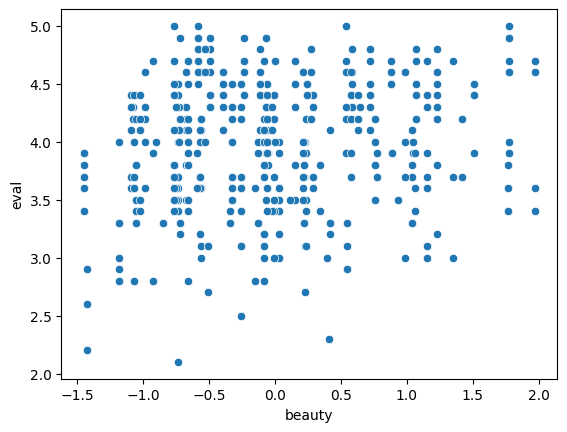

In [49]:
# your code here
print(ratings_df[['eval', 'beauty']].corr())

sns.scatterplot(data=ratings_df, x='beauty', y='eval')

# no correlation between eval and beauty ratings


### Does tenure affect teaching evaluation scores?

-   Use α = 0.05


In [52]:
# your code here
# Separate samples
tenure = ratings_df.loc[ratings_df['tenure'] == 'yes', 'eval']
no_tenure = ratings_df.loc[ratings_df['tenure'] == 'no', 'eval']

# Perform Student t-test
t, p = stats.ttest_ind(tenure, no_tenure)

# Print test results
print('Student t-test statistic: %.3f' % t)
print('p-value: %.3f' % p)

# Interpret test results
alpha = 0.05
if p > alpha:
    print('The difference between the means of the two samples is not significant (fail to reject H0)')
else:
    print('The difference between the means of the two samples is significant (reject H0)')


Student t-test statistic: -2.805
p-value: 0.005
The difference between the means of the two samples is significant (reject H0)


### Is there an association between age and tenure?

-   What is your conclusion at α = 0.01 and α = 0.05?


In [54]:
# your code here
# Separate samples
tenure = ratings_df.loc[ratings_df['tenure'] == 'yes', 'age']
no_tenure = ratings_df.loc[ratings_df['tenure'] == 'no', 'age']

# Perform Student t-test
t, p = stats.ttest_ind(tenure, no_tenure)

# Print test results
print('Student t-test statistic: %.3f' % t)
print('p-value: %.3f' % p)

# Interpret test results
print('alpha = 0.05')
alpha = 0.05
if p > alpha:
    print('The difference between the means of the two samples is not significant (fail to reject H0)')
else:
    print('The difference between the means of the two samples is significant (reject H0)')

print('alpha = 0.01')
alpha = 0.01
if p > alpha:
    print('The difference between the means of the two samples is not significant (fail to reject H0)')
else:
    print('The difference between the means of the two samples is significant (reject H0)')



Student t-test statistic: -2.133
p-value: 0.033
alpha = 0.05
The difference between the means of the two samples is significant (reject H0)
alpha = 0.01
The difference between the means of the two samples is not significant (fail to reject H0)


### Question 3: Test for equality of variance for beauty scores between tenured and non-tenured instructors

-   Use α = 0.05


In [57]:
# your code here
tenure = ratings_df.loc[ratings_df['tenure'] == 'yes', 'beauty']
no_tenure = ratings_df.loc[ratings_df['tenure'] == 'no', 'beauty']

t, p = levene(tenure, no_tenure)

# Print test results
print('Levene test statistic: %.3f' % t)
print('p-value: %.3f' % p)

# Interpret test results
print('alpha = 0.05')
alpha = 0.05
if p > alpha:
    print('The difference between the variance of the two samples is not significant (fail to reject H0)')
else:
    print('The difference between the variance of the two samples is significant (reject H0)')





Levene test statistic: 0.536
p-value: 0.464
alpha = 0.05
The difference between the variance of the two samples is not significant (fail to reject H0)


### Is there an association between visible minorities and tenure?

-   Use α = 0.05


In [58]:
# your code here
#define the contingency table
contigency = pd.crosstab(ratings_df['minority'], ratings_df['tenure'])
display(contigency)

stat, p, dof, expected = chi2_contingency(contigency)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

tenure,no,yes
minority,,
no,92,307
yes,10,54


p value is 0.2422396880023718
Independent (H0 holds true)
